Support Vector Machine in R
----

For the SVM we will use the e1071 library. Recall that SVC is the SVM with the linear kernel. Create a sample data set (two features). Plot to check the classes in y are not linearly separable.
----

Warning message:
"package 'e1071' was built under R version 3.4.3"

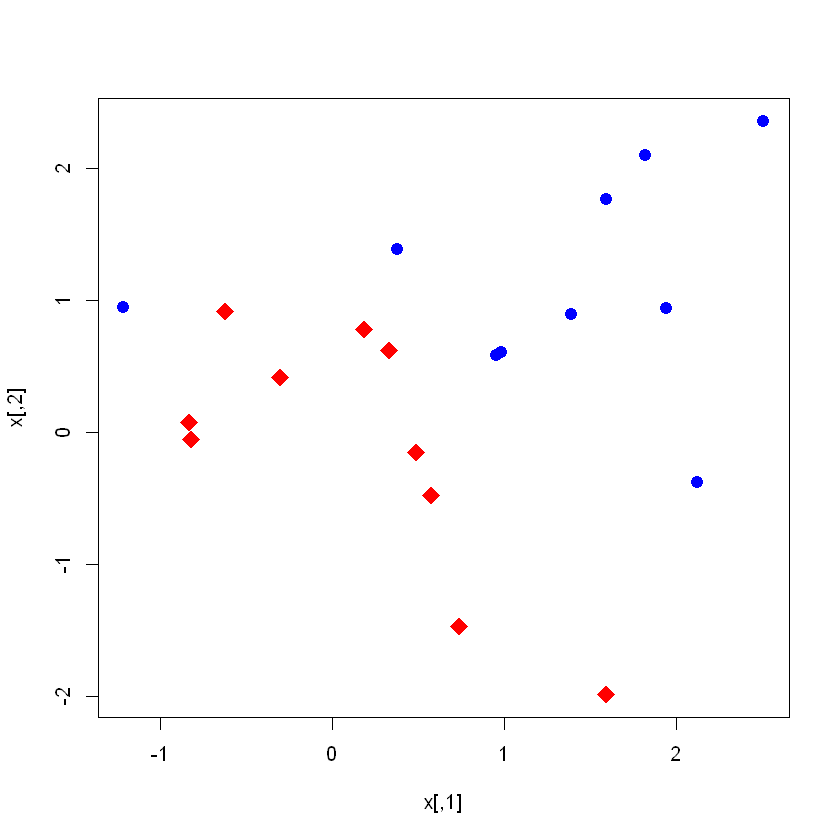

In [2]:
library(e1071)
set.seed(1)
x=matrix(rnorm(20*2), ncol=2)
y=c(rep(-1,10), rep(1,10))
x[y==1,] = x[y==1,] + 1
plot(x, col=(y+3),pch=(y+19),cex=2)

Prepare the data (y must be a factor), load the library, and create the SVC model (linear kernel) with cost 10 (C parameter).
----

In [11]:
dat=data.frame(x=x, y=as.factor(y))    # Creates a dataframe of x values with y as a factor/function of x
dat                                    # Previews the dat datastructure
svmfit=svm(y~., data=dat, kernel="linear", cost=10, scale=F)
summary(svmfit)

x.1,x.2,y
-0.6264538,0.91897737,-1
0.1836433,0.78213630,-1
-0.8356286,0.07456498,-1
1.5952808,-1.98935170,-1
0.3295078,0.61982575,-1
-0.8204684,-0.05612874,-1
0.4874291,-0.15579551,-1
0.7383247,-1.47075238,-1
0.5757814,-0.47815006,-1
-0.3053884,0.41794156,-1



Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = F)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




There are 7 support vectors: 4 from class "-1" and 3 from class "1". Check them, then plot the model.
----

[1]  1  2  5  7 14 16 17

,x.1,x.2
1,-0.6264538,0.9189774
2,0.1836433,0.7821363
5,0.3295078,0.6198257
7,0.4874291,-0.1557955
14,-1.2146999,0.9461950
16,0.9550664,0.5850054
17,0.9838097,0.6057100


,x.1,x.2,y
1,-0.6264538,0.9189774,-1
2,0.1836433,0.7821363,-1
5,0.3295078,0.6198257,-1
7,0.4874291,-0.1557955,-1
14,-1.2146999,0.9461950,1
16,0.9550664,0.5850054,1
17,0.9838097,0.6057100,1


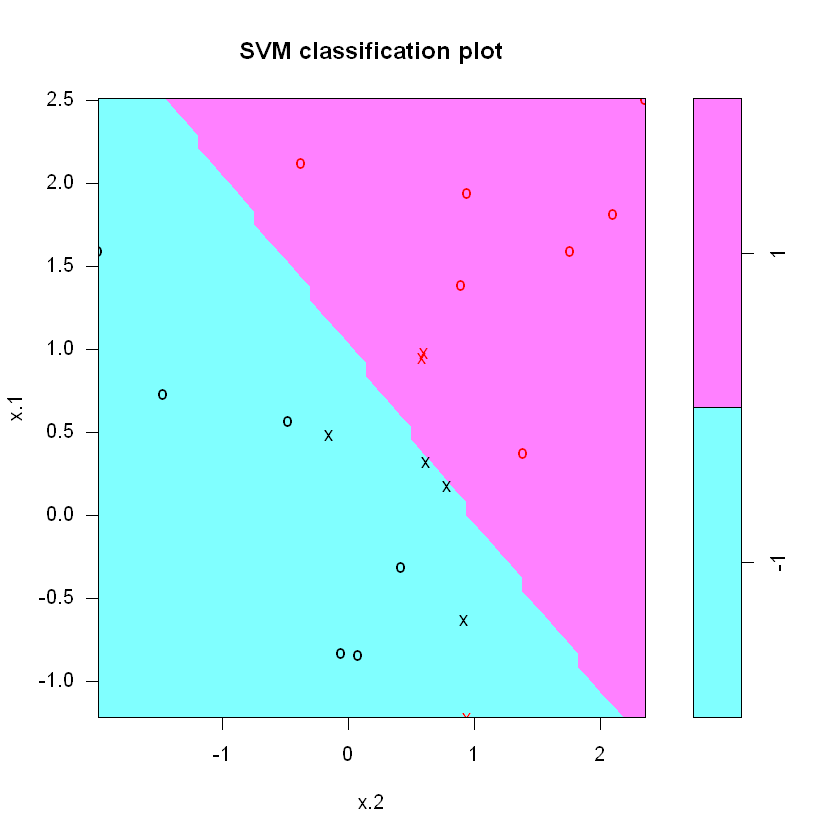

In [12]:
svmfit$index
svmfit$SV
dat[svmfit$index,]
plot(svmfit,dat)

Region for class "-1" is blue, for class "1" is pink. Points "x" are the support vectors.
----

Now change the cost to 0.1. Describe the difference:
----
The difference is that cost 0.1 greatly overfits the data, or so it seems.

The e1071 library provides a tune() function to perform cross-validation and tune the parameters.
----


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.60  0.3944053
2 1e-02  0.60  0.3944053
3 1e-01  0.15  0.2415229
4 1e+00  0.10  0.2108185
5 1e+01  0.10  0.2108185
6 1e+02  0.10  0.2108185
7 1e+03  0.10  0.2108185



Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = 10^(-3:3)), 
    kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  11

 ( 6 5 )


Number of Classes:  2 

Levels: 
 -1 1




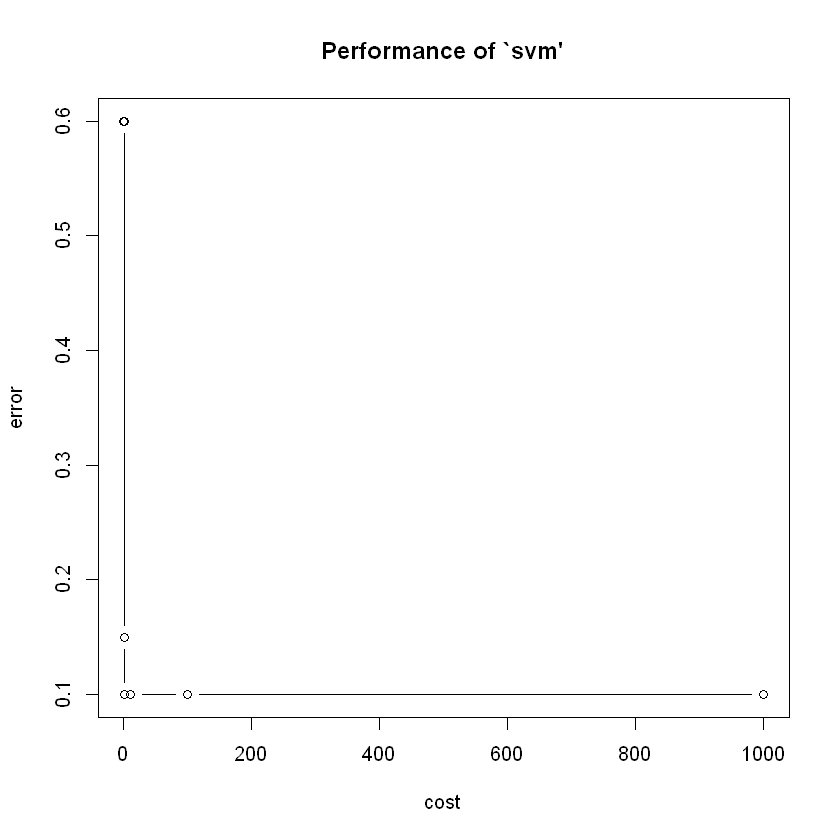

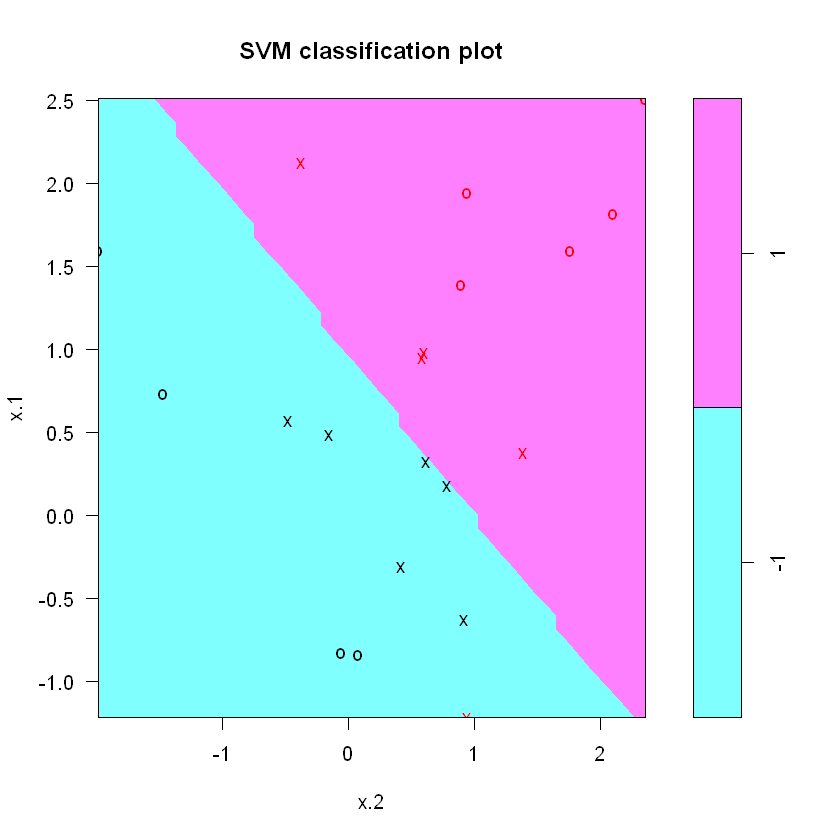

In [13]:
t.out=tune(svm, y~., data=dat, kernel="linear", ranges=list(cost=10^(-3:3)))
summary(t.out)
plot(t.out)
best = t.out$best.model
summary(best)
plot(best,dat)

The predict() function can be used to predict the class label on a set of test observations, at any given value of the cost parameter. We begin by generating a test data set.
----

In [14]:
xtest=matrix(rnorm(20*2), ncol=2)
ytest=sample(c(-1,1), 20, rep=T)
xtest[ytest==1,]=xtest[ytest==1,]+1
testdat=data.frame(x=xtest, y=as.factor(ytest))
ypred = predict(best, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1  4  2
     1   3 11

What if we had instead used cost=0.01?
----

In [15]:
svmfit=svm(y~., data=dat, kernal="linear", cost=0.01, scale=F)
ypred=predict(svmfit, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1  6  2
     1   1 11

Let us make the training data be linearly separable.
----

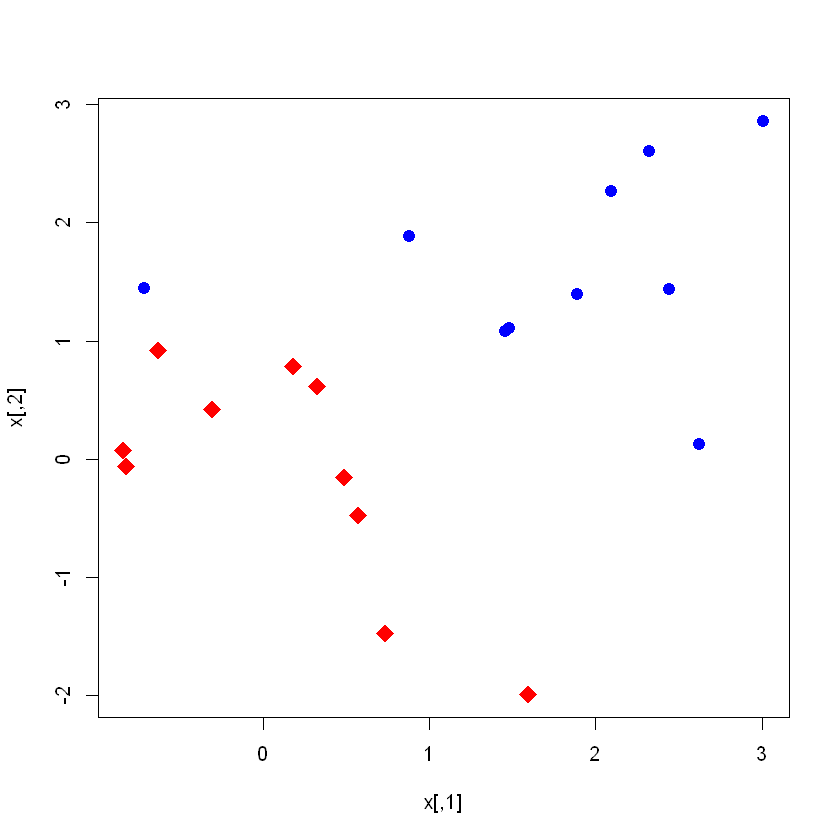

In [16]:
x[y==1,]=x[y==1,]+0.5
plot(x, col=(y+3), pch=(y+19), cex=2)

Note that observations are just barely linearly separable. Let us pick cost=1e5 to avoid misclassification.
----


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 
      gamma:  0.5 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




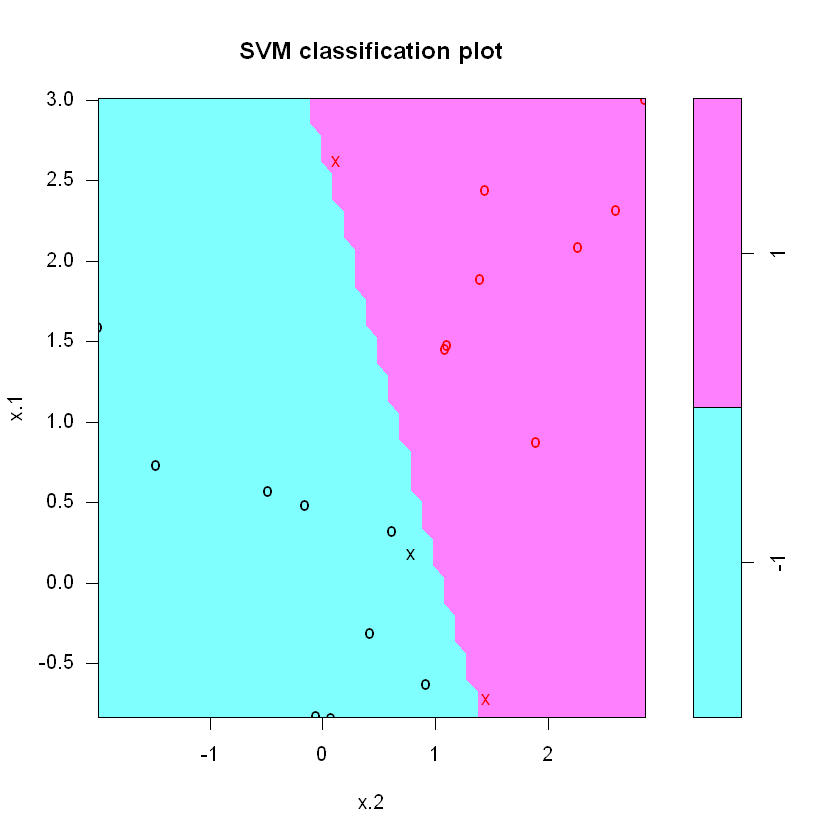

In [17]:
dat=data.frame(x=x, y=as.factor(y))
svmfit=svm(y~., data=dat, kernel="linear", cost=1e5)
summary(svmfit)
plot(svmfit, dat)

Margins are too tight, the model is likely to be overfitted.
----

In [18]:
ypred=predict(svmfit, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1 1
     -1  5 6
     1   2 7

Check the difference if cost=1
----


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.5 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




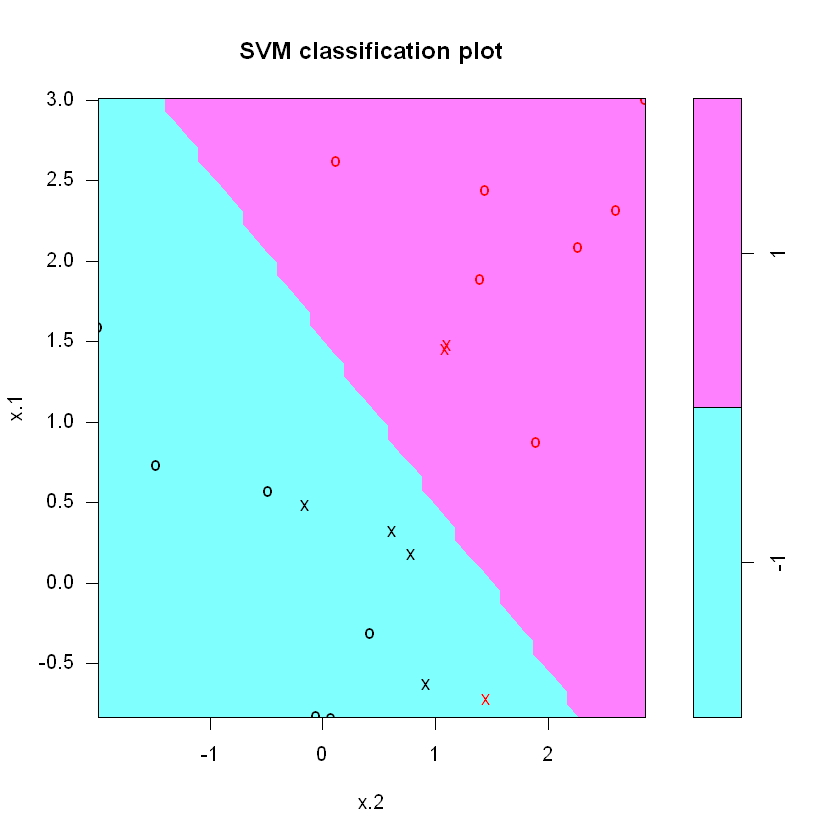

In [19]:
svmfit=svm(y~., data=dat, kernel="linear", cost=1)
summary(svmfit)
plot(svmfit, dat)

Which model is doing a better job?
----

Support Vector Machines w/ Radial Kernels
----
To fit an SVM with a polynomial kernel, we use kernel="polynomial", and to fit an SVM with a radial kernel we use kernel="radial". In the former case, we also use the degree argument to specify a degree for the polynomial kernel, and in the latter case we use gamma to specify a value of gamma for the radial basis kernel.

First generate some data with a non-linear class boundary, as follows:
----

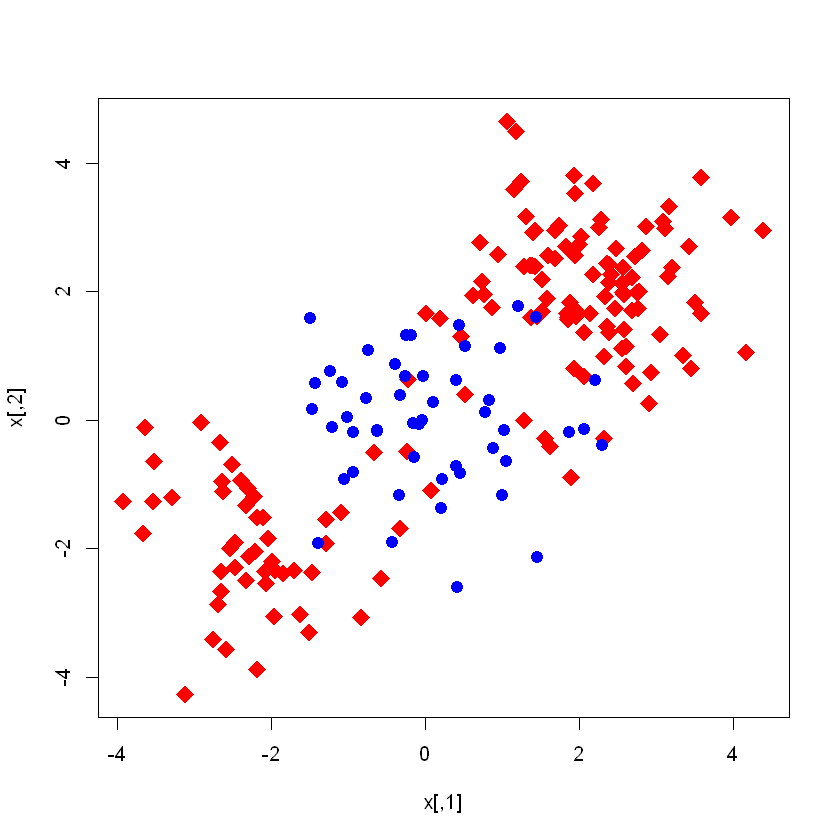

In [20]:
set.seed(1)
x=matrix(rnorm(200*2), ncol=2)
x[1:100,] = x[1:100,]+2
x[101:150,]=x[101:150,]-2
y=c(rep(-1,150), rep(1,50))
dat=data.frame(x=x, y=as.factor(y))
plot(x, col=(y+3), pch=(y+19), cex=2)

The data is randomly split into training and test groups. We then fit the training data using the svm() function with a radial kernel and gamma=1:
----

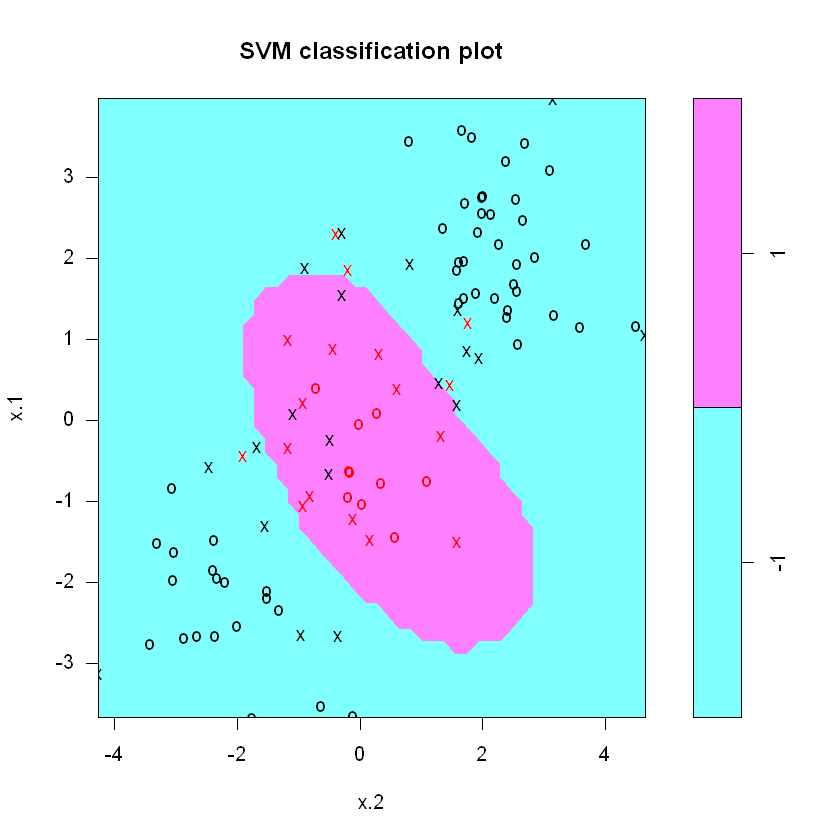

In [21]:
train=sample(200,100)
svm.radial=svm(y~., data=dat[train,], kernal="radial", gamma=1, cost=1)
plot(svm.radial, dat[train,])

Find the best gamma and cost:
----

In [22]:
set.seed(1)
tune.out=tune(svm, y~., data=dat[train,], kernal = "radial", ranges=list(lost=10^(-1:2), gamma=c(0.5, 1:4)))
summary(tune.out)
ypred=predict(tune.out$best.model, newdata=dat[-train,])
table(predict=ypred, truth=dat[-train, "y"])


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 lost gamma
  0.1     2

- best performance: 0.12 

- Detailed performance results:
    lost gamma error dispersion
1    0.1   0.5  0.13 0.08232726
2    1.0   0.5  0.13 0.08232726
3   10.0   0.5  0.13 0.08232726
4  100.0   0.5  0.13 0.08232726
5    0.1   1.0  0.13 0.08232726
6    1.0   1.0  0.13 0.08232726
7   10.0   1.0  0.13 0.08232726
8  100.0   1.0  0.13 0.08232726
9    0.1   2.0  0.12 0.09189366
10   1.0   2.0  0.12 0.09189366
11  10.0   2.0  0.12 0.09189366
12 100.0   2.0  0.12 0.09189366
13   0.1   3.0  0.13 0.09486833
14   1.0   3.0  0.13 0.09486833
15  10.0   3.0  0.13 0.09486833
16 100.0   3.0  0.13 0.09486833
17   0.1   4.0  0.15 0.10801234
18   1.0   4.0  0.15 0.10801234
19  10.0   4.0  0.15 0.10801234
20 100.0   4.0  0.15 0.10801234


       truth
predict -1  1
     -1 74  7
     1   3 16

The data is randomly split into training and testing groups. We then fit the training data using the svm() function with a radial kernel and gamma=1:
----

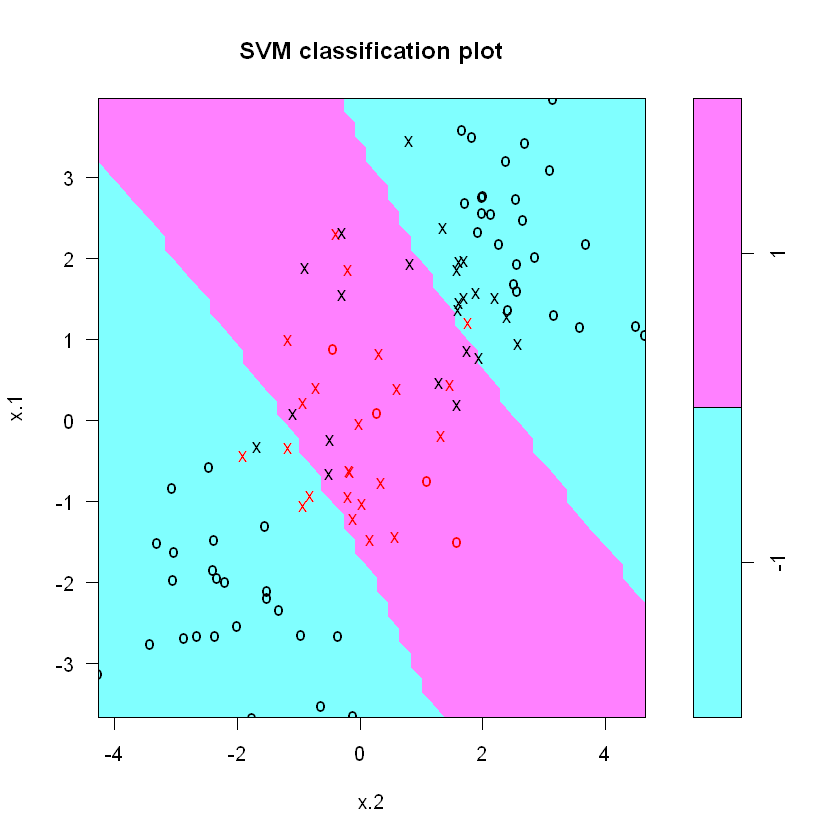

In [23]:
svm.poly=svm(y~., data=dat[train,], kernel="polynomial", degree=2, cost=1)
plot(svm.poly, dat[train,])

Find the best degree and cost:
----

In [24]:
set.seed(1)
tune.out=tune(svm, y~., data=dat[train,], kernel="polynomial", ranges=list(cost=10^(-1:2), degree=(1:4)))
summary(tune.out)
ypred=predict(tune.out$best.model, newdata=dat[-train,])
table(predict=ypred, truth=dat[-train,"y"])


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
   10      4

- best performance: 0.15 

- Detailed performance results:
    cost degree error dispersion
1    0.1      1  0.27  0.1159502
2    1.0      1  0.27  0.1159502
3   10.0      1  0.27  0.1159502
4  100.0      1  0.27  0.1159502
5    0.1      2  0.27  0.1159502
6    1.0      2  0.17  0.1251666
7   10.0      2  0.16  0.1264911
8  100.0      2  0.16  0.1264911
9    0.1      3  0.27  0.1159502
10   1.0      3  0.27  0.1159502
11  10.0      3  0.27  0.1159502
12 100.0      3  0.27  0.1159502
13   0.1      4  0.27  0.1159502
14   1.0      4  0.20  0.1563472
15  10.0      4  0.15  0.1178511
16 100.0      4  0.18  0.1135292


       truth
predict -1  1
     -1 66  2
     1  11 21

ROC Curves
----
The ROCR package can be used to produce ROC curves. First, write a short function to plot an ROC curve given a vector containing a numerical score for each observation, pred, and a vector containing the class label for each observation, truth.

In [50]:
#install.packages("ROCR", repos='http://cran.us.r-project.org')
library(ROCR)

rocplot=function(pred, truth, ...){ 
    predob=prediction(pred, truth)
    perf=performance(predob, "tpr", "fpr")
    plot(perf,...)}

In order to obtain the fitted values for a given SVM model fit, we used decision.values=T when fitting svm(). Then the predict() function will output the fitted values.
----

In [177]:
svmfit.opt=svm(y~., data=dat[train,], kernel="radial", gamma=2, cost=1, decision.values=T)
fitted = attributes(predict(svmfit.opt, dat[train,], decision.values=T))$decision.values

Now we can produce the ROC plot:
----

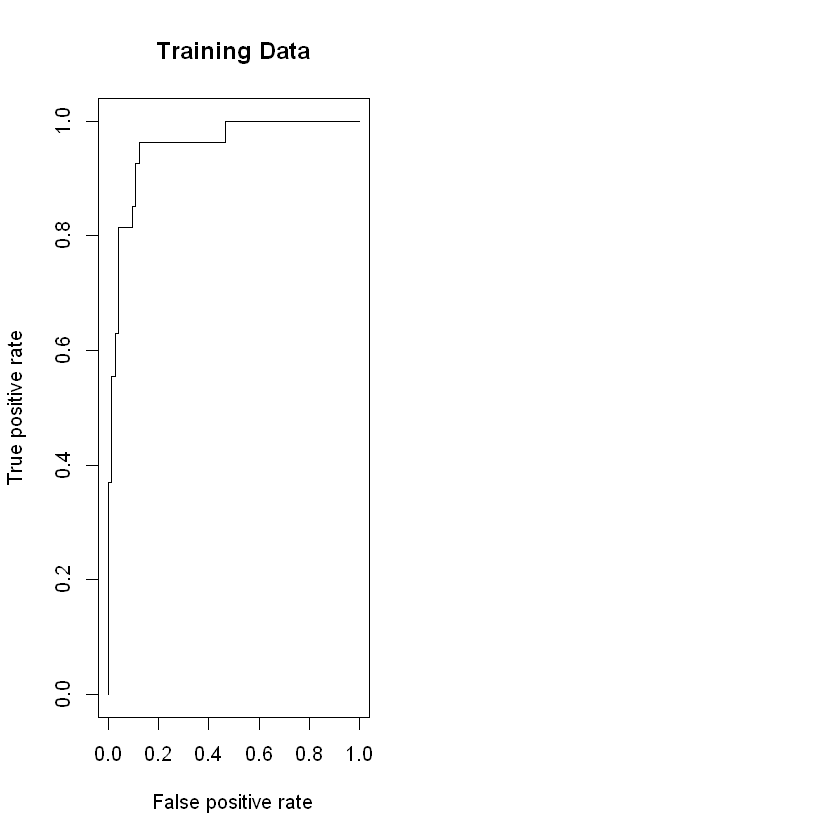

In [178]:
par(mfrow = c(1,2))
rocplot(fitted, dat[train, "y"], main="Training Data")

SVM appears to be producing accurate predictions. By increasing gamma we can produce a more flexible fit and generate futher improvements in accuracy.
----

In [179]:
svmfit.flex=svm(y~.,data=dat[train,],kernel="radial",gamma=50,cost=1,decision.values=T)
fitted = attributes(predict(svmfit.flex,dat[train,],decision.values=T))$decision.values

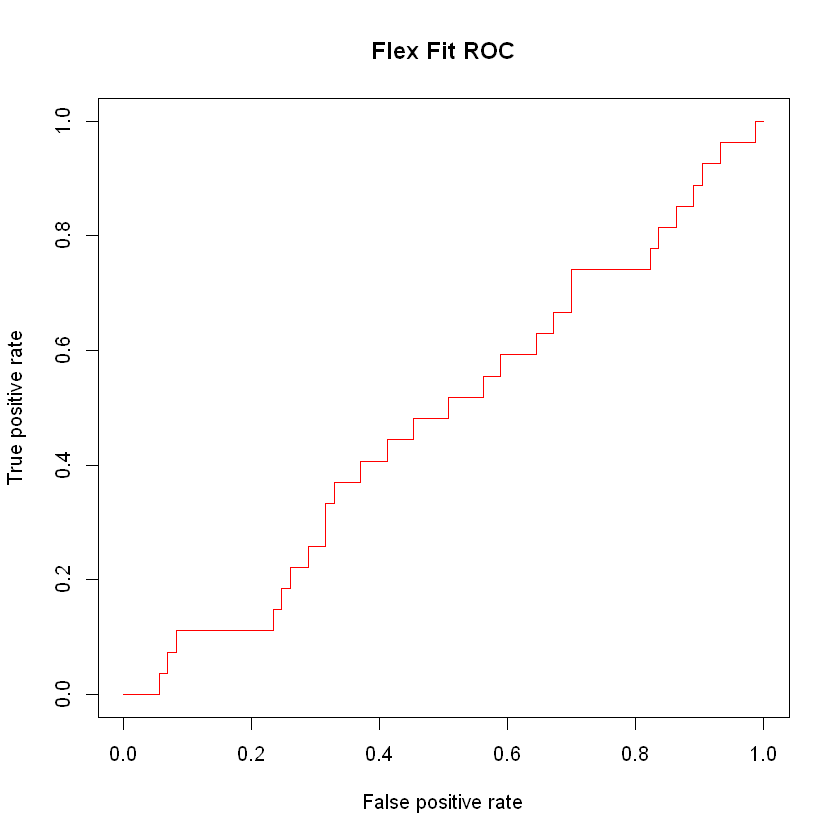

In [192]:
rocplot(fitted, dat[train, "y"], main = "Flex Fit ROC",col="red")

Those ROC plots are all on the testing data. Now, lets fit to the training data.
----

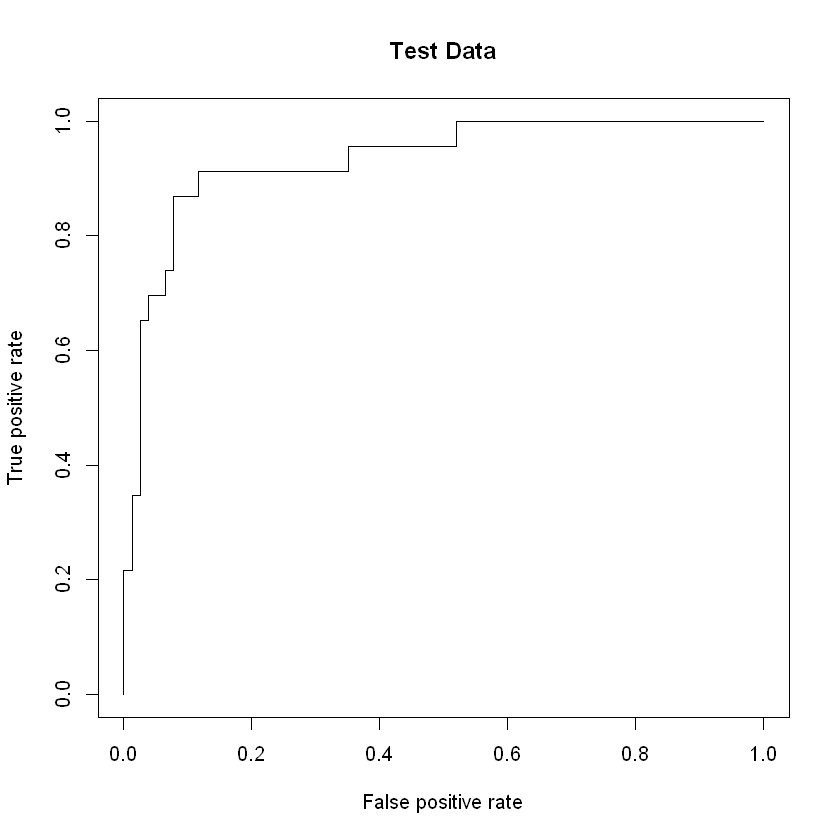

In [183]:
fitted=attributes(predict(svmfit.opt, dat[-train,], decision.values=T))$decision.values
rocplot(fitted, dat[-train, "y"], main="Test Data")

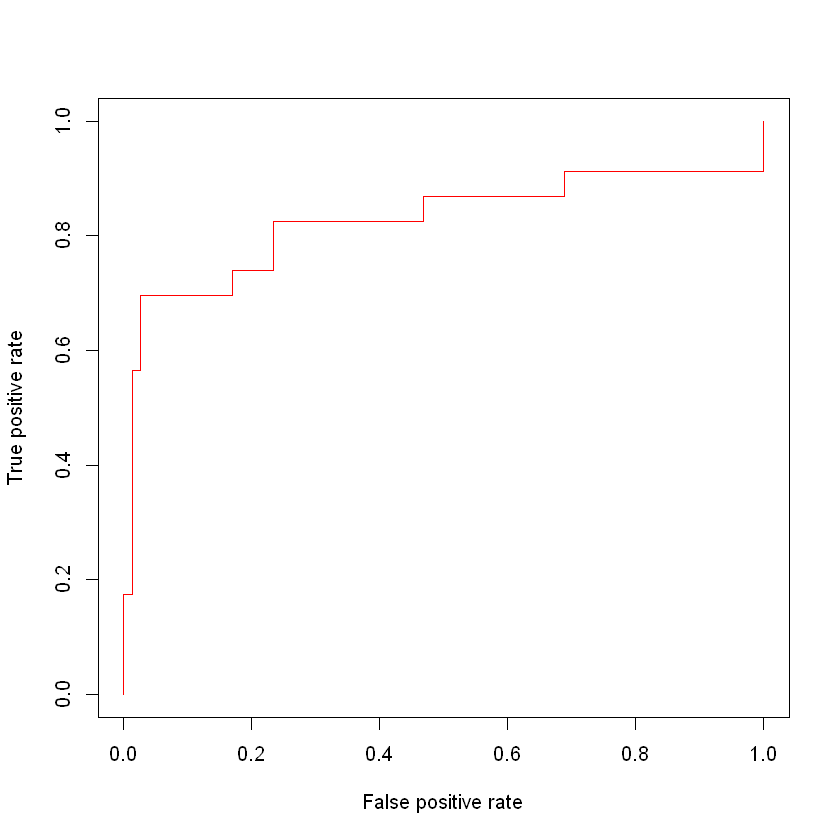

In [190]:
fitted=attributes(predict(svmfit.flex, dat[-train,], decision.values=T))$decision.values
rocplot(fitted, dat[-train, "y"], col="red")

SVM with Multiple Classes
----
If the response is a factor containing more than two levels, then the svm() function will perform a multi-class classification using the one-versus-one approach. We explored that setting here by generating a third class of observations.

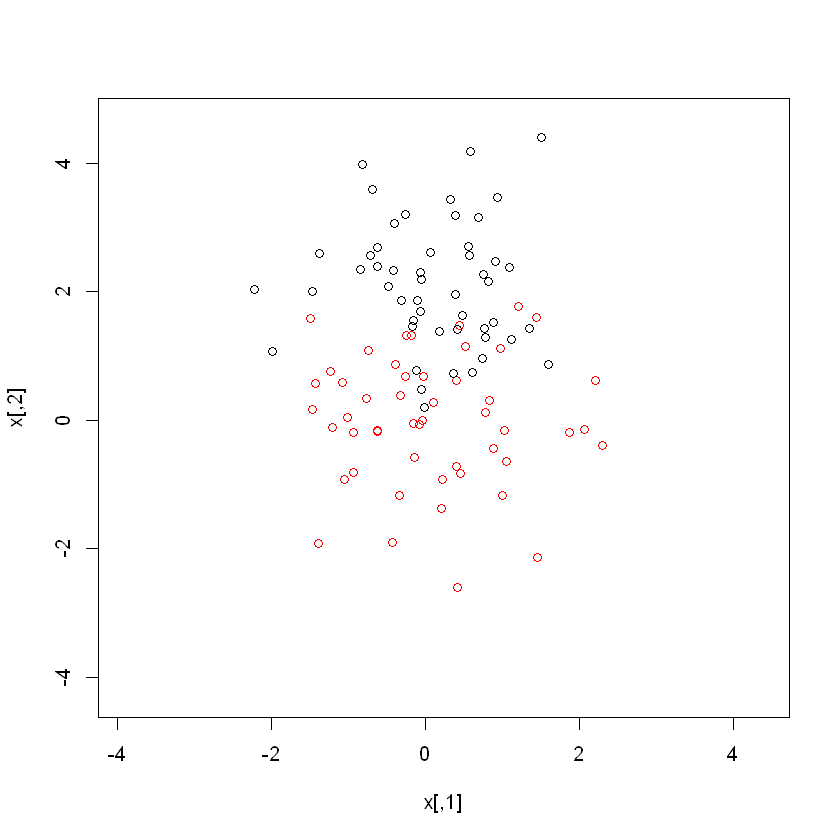

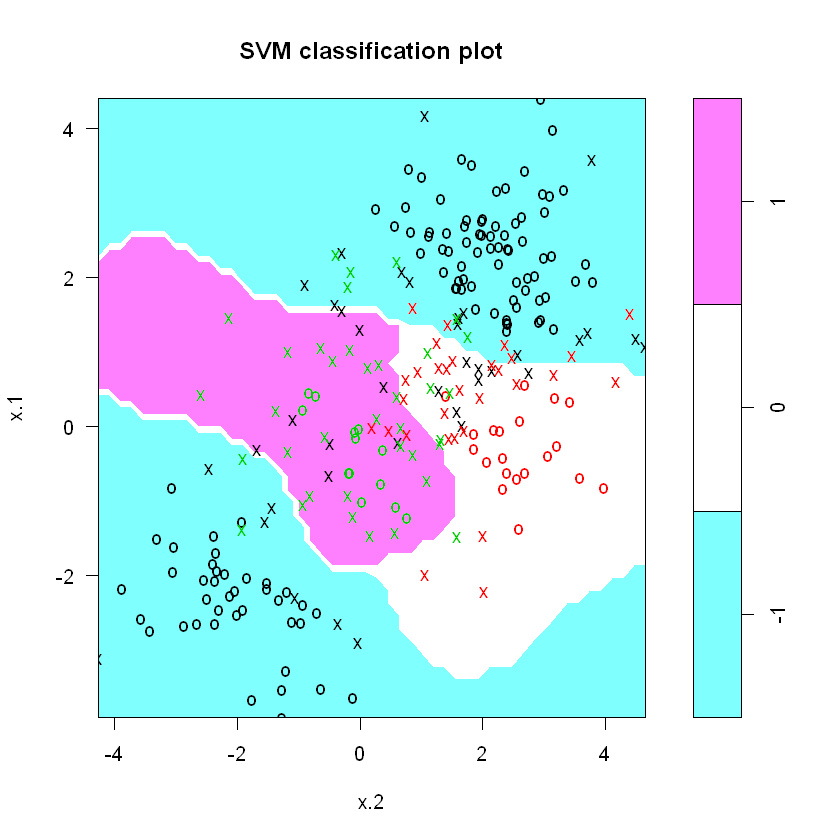

In [193]:
set.seed(1)
x=rbind(x, matrix(rnorm(50*2), ncol=2))
y=c(y, rep(0,50))
x[y==0,2]=x[y==0,2]+2
dat = data.frame(x=x, y=as.factor(y))
par(mfrow=c(1,1))
plot(x, col=(y+1))

# Now, fit the SVM to the data
svmfit = svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)

Application to Gene Expression data:
----

We now examine the Khan data set, which consists of a number of tissue samples corresponding to four distinct types of small round blue cell tumors. For each tissue sample, gene expression measurements are available. The data set consists of training data, xtrain and ytrain, and testing data, xtest and ytest.

In [196]:
library(ISLR)
names(Khan)
dim(Khan$xtrain)
dim(Khan$xtest)
length(Khan$ytrain)
length(Khan$ytest)

Warning message:
"package 'ISLR' was built under R version 3.4.3"

[1] "xtrain" "xtest"  "ytrain" "ytest"

[1]   63 2308

[1]   20 2308

[1] 63

[1] 20

This data set consists of expression measurements for 2,308 genes. The training and test sets consist of 63 and 20 observations, respectively.
----

In [197]:
table(Khan$ytrain)
table(Khan$ytest)


 1  2  3  4 
 8 23 12 20 


1 2 3 4 
3 6 6 5 

In this data set, there are a very large number of features relative to the number of observations. This suggests that we should use a linear kernel. The additional flexibility from using a polynomial or radial kernel is unnecessary.
----

In [198]:
dat=data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
out=svm(y~., data=dat, kernel="linear", cost=10)
summary(out)
table(out$fitted, dat$y)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.0004332756 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

As you can see, there are no training errors.
----